### **SIV Project**
---
Project by Christian Dal Farra and Marco Panciera,

this project implement the article [DETECTING POTHOLES USING SIMPLE IMAGE PROCESSING TECHNIQUES AND REAL-WORLD FOOTAGE](https://www.researchgate.net/publication/279538022_Detecting_Potholes_Using_Simple_Image_Processing_Techniques_and_Real-World_Footage)

Start importing some libraries that we need

In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Import the image

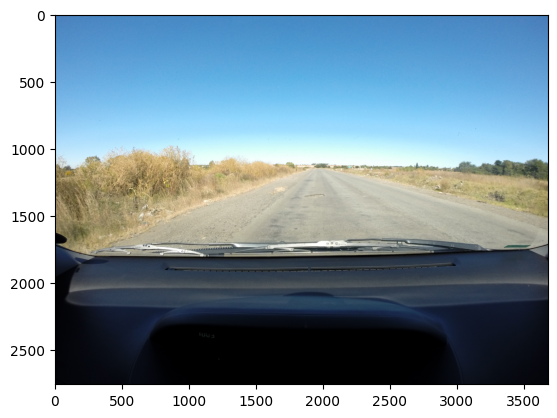

In [88]:
image_path = 'test_images/G0064806.jpg'
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Immagine non trovata o percorso errato!")

image_rgb = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.imshow(image_rgb)

Here there is an image that shows the pipeline, the **image are taken by a camera mounted inside the vehicle**  on the front windscreen, for more accurately develop a device that can be fitted to a vehicle for commercial use, we found the dataset used for some practical testing at that link [NinjaDataset](https://datasetninja.com/road-pothole-images)

![Alt text](presentation_images/algortihm_block_diagram.png "Algortihm block scheme")

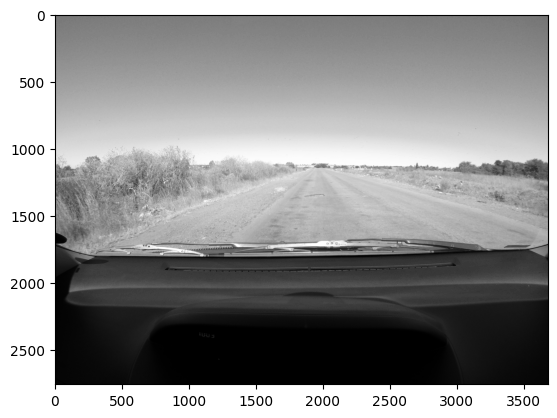

In [89]:
# Converti in scala di grigi
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

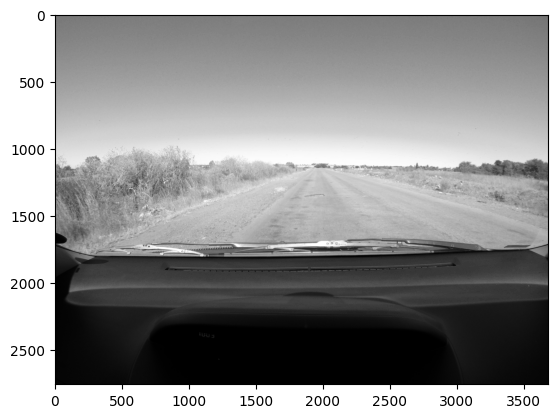

In [90]:
# Applica un filtro gaussiano per ridurre il rumore
blurred_image = cv2.GaussianBlur(gray_image, (3, 3),0)
plt.imshow(blurred_image, cmap='gray')

In [91]:
# Applica il filtro Canny per il rilevamento dei bordi
edges = cv2.Canny(blurred_image, 50, 150)

# Dilatazione per eliminare bordi non desiderati e unire quelli vicini
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilated_edges = cv2.dilate(edges, kernel, iterations=2)

In [92]:
# Trova i contorni
contours, _ = cv2.findContours(dilated_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [93]:
# Filtra i contorni in base alla dimensione (modello delle buche)
potholes = []
for contour in contours:
    area = cv2.contourArea(contour)
    if 400 < area < 550:  # Dimensioni approssimative delle buche
        potholes.append(contour)


In [94]:
# Disegna i contorni rilevati sull'immagine originale
for contour in potholes:
    cv2.drawContours(image, [contour], -1, (0, 0, 255), 2)

In [86]:
# Mostra il risultato
im_resized = cv2.resize(image, (500, 500), interpolation=cv2.INTER_LINEAR)

cv2.imshow('Pothole Detection', im_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()